In [117]:
import matplotlib.pyplot as plt
import numpy as np

# 1C Metoda prediktor-korektor

In [118]:
def dy(x_n,y_n):
    return (y_n**2+1)/(x_n*y_n)

$ y_1, y_2, y_3$ Jednokrok metodou RK4 r

In [119]:
def RK4(x_0, y_0, h):
    x, y = [x_0], [y_0]

    for i in range(3):
        k_1 = h * dy(x[-1], y[-1])
        k_2 = h * dy(x[-1]+ h/2, y[-1] + (h/2) * k_1)
        k_3 = h * dy(x[-1]+ h/2, y[-1] + (h/2) * k_2)
        k_4 = h * dy(x[-1]+ h, y[-1]+ h * k_3)
        y.append(y[-1] + (1/6)*(k_1 + 2*k_2 + 2*k_3 + k_4))    
        x.append(x[-1]+h)
    return x,y

In [120]:
def A_B(x,y, h):
    f_hodnoty = [dy(x[-i], y[-i]) for i in range (1,5)]
    prediktor = y[-1] + (h/24) * (55* f_hodnoty[0] - 59* f_hodnoty[1] + 37* f_hodnoty[2] - 9* f_hodnoty[3])
    y.append(prediktor)
    x.append(x[-1] + h)
    return x, y

In [121]:
def A_M(x,y,h):
    f_hodnoty = [ dy(x[-i],y[-i]) for i in range(1,5) ]
    korektor = y[-2] + (h/24) * (9* f_hodnoty[0] + 19* f_hodnoty[1] - 5* f_hodnoty[2] + f_hodnoty[3])
    y[-1] = korektor

    return x,y

Pocatecni podminky

In [122]:
x_0, y_0 = 1.0, 2.0
x_max = 5.0
h = 0.01

Program

In [123]:
x, y = RK4(x_0,y_0, h)
while x[-1]< x_max:
    x,y = A_B(x,y,h)
    x,y = A_M(x,y,h)

Vysledek

Text(0.5, 1.0, 'Metoda prediktor-korektor')

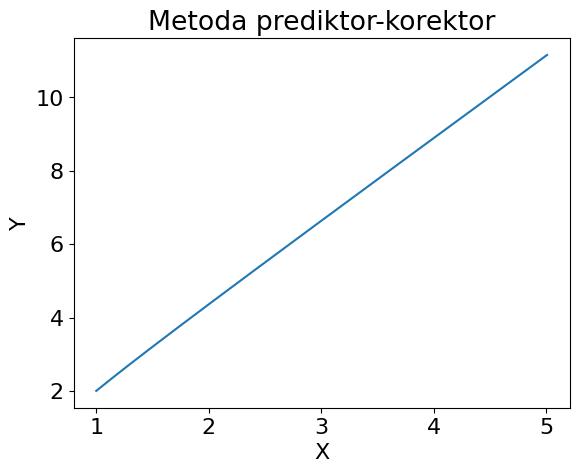

In [124]:
plt.rcParams.update({'font.size': 16})
plt.plot(x,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Metoda prediktor-korektor")

## 2C Porovnani s analytickym resenim

In [125]:
def analyticke_reseni(x_0, x_max, h):
    y = [np.sqrt(5*i**2 -1) for i in np.arange(x_0, x_max,h)]
    x = [i for i in np.arange(x_0,x_max,h)]
    return x,y

Text(0.5, 1.0, 'Analytické řešení')

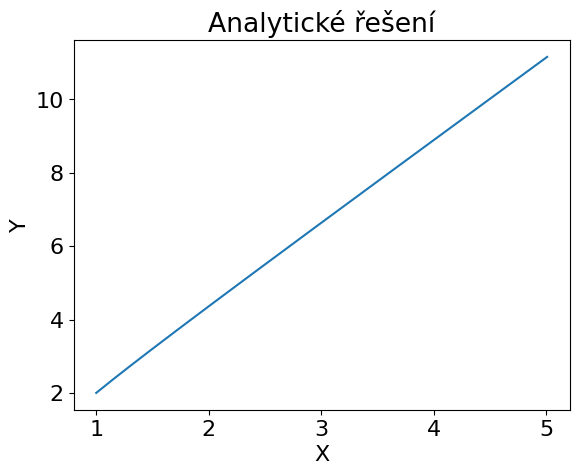

In [126]:
y_m = np.array(y)

x_a, y_a = analyticke_reseni(x_0, x[-1], h)
y_a = np.array(y_a)

plt.plot(x,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Analytické řešení")

Text(0, 0.5, 'Chyba')

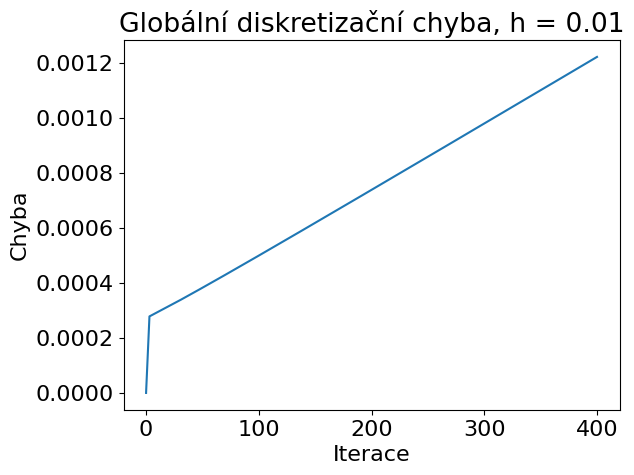

In [128]:
globalni_diskr_chyba = np.abs(y_a - y_m[:-1])

plt.plot(globalni_diskr_chyba, label = "Metoda P-K - Analytické řešení")
plt.title(f"Globální diskretizační chyba, h = {h}")
plt.xlabel("Iterace")
plt.ylabel("Chyba")